In [1]:
# read the training data into pandas and print it out
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/vehicles_train.csv')
train

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [3]:
# encode car as 0 and truck as 1
train['type'] = train.type.map({'car':0,'truck':1})

In [4]:
# create a list of feature columns
feature_cols = train.columns[1:]

In [5]:
# define X (features) and y (response)
X = train[feature_cols]
y = train.price

In [6]:
# import the relevant class, and instantiate the model (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)

In [7]:
# print the model object to see the default arguments
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [9]:
# use 3-fold cross-validation to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
import numpy as np
scores = cross_val_score(treereg,X,y,cv=3,scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

4707.2505884845632

In [10]:
# reduce RMSE by tuning the max_depth parameter
# define a range of values
max_depth_range = range(1,11)

# create an empty list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use cross-validation with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
# print the results
RMSE_scores

[4928.1374642038018,
 4804.3767888427128,
 4592.1554255755254,
 4704.0052694797387,
 4707.2505884845632,
 4707.2505884845632,
 4707.2505884845632,
 4707.2505884845632,
 4707.2505884845632,
 4707.2505884845632]

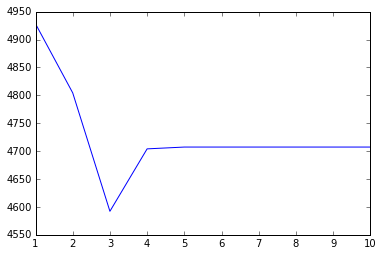

In [11]:
# plot the max depth (x-axis) versus the RMSE (y-axis)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(max_depth_range, RMSE_scores)

In [12]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [13]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols,'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,type,0.000000


In [16]:
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("tree_vehicles.dot",'wb') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)

# at the command line, run this to convert to PNG:
# dot -Tpng tree_vehicles.dot -o tree_vehicles.png

None


In [18]:
# read the test data
test = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/vehicles_test.csv')

# encode car as 0 and truck as 1
test['type'] = test.type.map({'car':0,'truck':1})

# print the data
test

,price,year,miles,doors,type
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [19]:
# define X and y
X_test = test[feature_cols]
y_test = test.price

In [20]:
# make predictions on test data
y_pred = treereg.predict(X_test)
y_pred

array([  4000.,   5000.,  13500.])

In [21]:
# calculate RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1190.2380714238084

In [22]:
# calculate RMSE for your own tree!
y_test = [3000,6000,12000]
y_pred = [3057, 3057, 16333]
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

3024.3118776563592

In [40]:
# read into the data
titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/titanic_train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [41]:
# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0,'male':1})

# fill in the missing values for age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

# create three dummy variables, drop the first dummy variable, and store the two remaining columns as a DataFrame
embarked_dummies = pd.get_dummies(titanic.Embarked,prefix='Embarked').iloc[:,1:]

# concatenate the two dummy variable columns onto the original DataFrame
titanic = pd.concat([titanic,embarked_dummies],axis=1)

# print the updated DataFrame
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,0,0


In [42]:
# create a list of the feature columns
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']

In [43]:
# define X (features) and y (response)
X = titanic[feature_cols]
y = titanic.Survived

In [44]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=1, splitter='best')

In [45]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols,'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258
